# 2024 NBA Future Analytics Stars Coding Exercise

## Task

Predict each player’s three-point percentage at the end of the 2022-23 season given their shooting
statistics from October/November 2022.

## Data

- **Name** - player’s name
- **three_pct_season** – the player’s three-point percentage over the course of the full season (not including shots from the backcourt)
- **lwr_paint_pct_oct_nov** - the player's field goal% from shot attempts within 8 feet of the basket in october and november
- **upr_paint_pct_oct_nov** - the player's field goal% from shot attempts between 8 to 16 feet of the basket in october and november
- **mid_pct_oct_nov** - the player's field goal% from shot attempts greater than 16 feet from the basket that are not three point attempts in october and november
- **three_non_cnr_pct_oct_nov** - the player's field goal% from non-corner shot attempts from three point range in october and november
- **three_cnr_pct_oct_nov** - the player's field goal% from corner shot attempts from three-point range in october and november
- **ft_pct_oct_nov** - the player's free throw% in october and november
- **lwr_paint_shots_oct_nov** - the player's total shot attempts from shot attempts within 8 feet of the basket in october and november
- **upr_paint_shots_oct_nov** - the player's total shot attempts from shot attempts between 8 to 16 feet from the basket in october and november
- **mid_shots_oct_nov** - the player's total shot attempts from shot attempts greater than 16 feet from the basket that are not three-point attempts in october and november
- **three_non_cnr_shots_oct_nov** - the player's total shot attempts from non-corner shot attempts from three point range in october and november
- **three_cnr_shots_oct_nov** - the player's total shot attempts from corner shot attempts from three point range in october and november
- **ft_shots_oct_nov** - the player's free throw attempts in october and november

## Introduction

This notebook contains my analysis of the provided data, my thought process as I worked through the problem, and the way I ultimately landed on my preferred solution.

This can more or less be read as a chronological summary of my exploration and analysis, with some cleaning to improve readability.

**Works Cited**
- This work was done using techniques I learned/practiced while working through Codecademy courses on data analysis, specifically the data inference path lessons on multiple linear regression: https://www.codecademy.com/enrolled/paths/data-science-inf
- Additionally, the resource I referenced for validating/testing models was the FiveThirtyEight article detailing their attempt to check their model performance: https://projects.fivethirtyeight.com/checking-our-work/

## Load and Inspect Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [20]:
df = pd.read_csv('fas_2024.csv')
df.head(10)

,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
0,Malcolm Brogdon,0.437,0.484,0.619,0.600,0.444,0.485,0.863,62,21,10,27,33,51
1,Tyrese Maxey,0.435,0.505,0.452,0.458,0.512,0.361,0.738,105,42,24,41,61,65
2,Stephen Curry,0.432,0.706,0.526,0.467,0.415,0.466,0.907,109,38,30,82,148,107
3,Kentavious Caldwell-Pope,0.422,0.484,0.250,0.448,0.512,0.476,0.767,31,16,29,43,42,30
4,Jevon Carter,0.421,0.483,0.375,0.500,0.321,0.480,0.846,29,16,32,28,50,13
5,Jalen Brunson,0.418,0.567,0.462,0.400,0.286,0.395,0.878,120,91,15,42,43,115
6,Michael Porter Jr.,0.416,0.617,0.478,0.273,0.481,0.365,0.800,47,23,22,52,52,30
7,Klay Thompson,0.412,0.485,0.395,0.355,0.327,0.421,0.808,33,38,31,49,121,26
8,Alec Burks,0.412,0.571,0.500,0.313,0.474,0.360,0.821,14,24,16,19,25,56
9,Darius Garland,0.410,0.438,0.519,0.375,0.415,0.415,0.855,73,52,32,41,65,83


In [23]:
df.tail(10)

,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
98,Ja Morant,0.308,0.542,0.393,0.500,0.350,0.386,0.743,192,89,10,40,44,167
99,Paolo Banchero,0.299,0.605,0.375,0.359,0.304,0.250,0.732,119,40,39,23,32,127
100,John Wall,0.298,0.638,0.450,0.355,0.150,0.289,0.658,69,20,31,20,38,76
101,Jalen Smith,0.289,0.662,0.286,0.214,0.370,0.243,0.765,77,14,14,46,37,51
102,John Collins,0.285,0.702,0.469,0.400,0.200,0.184,0.845,94,32,10,30,38,58
103,Scottie Barnes,0.283,0.577,0.167,0.346,0.364,0.343,0.724,111,30,26,33,35,29
104,Killian Hayes,0.280,0.278,0.446,0.368,0.200,0.406,0.842,54,56,19,30,32,19
105,Giannis Antetokounmpo,0.275,0.664,0.268,0.419,0.241,0.222,0.608,238,41,31,29,27,212
106,Bol Bol,0.268,0.800,0.452,0.231,0.500,0.333,0.767,100,31,13,22,21,43
107,Dennis Smith Jr.,0.220,0.562,0.381,0.300,0.364,0.316,0.500,73,21,10,11,19,12


Data is seemingly sorted by decreasing season 3 point percentage. From inspection of the first 20 rows, I don't see any missing or obviouly erroneous data, but I will check this further.

In [7]:
df.describe(include='all')

,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
count,108,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
unique,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Malcolm Brogdon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.361176,0.575398,0.435944,0.407519,0.366417,0.355046,0.801222,88.138889,40.425926,24.092593,39.435185,57.472222,69.425926
std,NaN,0.039623,0.083720,0.091394,0.121003,0.088564,0.068755,0.083965,42.961939,25.618409,13.055265,15.021028,28.042177,46.346965
min,NaN,0.220000,0.278000,0.167000,0.000000,0.150000,0.167000,0.500000,14.000000,10.000000,10.000000,11.000000,12.000000,7.000000
25%,NaN,0.337000,0.514000,0.388250,0.330000,0.307000,0.316000,0.741000,54.000000,23.000000,14.000000,28.000000,35.000000,34.000000
50%,NaN,0.366500,0.578500,0.444000,0.402500,0.364000,0.359000,0.811000,85.000000,34.000000,22.000000,40.500000,55.500000,58.000000
75%,NaN,0.387250,0.625750,0.488750,0.477250,0.426750,0.394250,0.868500,111.250000,50.000000,31.000000,49.000000,74.250000,96.000000


In [8]:
df.isna().sum()

Name                           0
three_pct_season               0
lwr_paint_pct_oct_nov          0
upr_paint_pct_oct_nov          0
mid_pct_oct_nov                0
three_non_cnr_pct_oct_nov      0
three_cnr_pct_oct_nov          0
ft_pct_oct_nov                 0
lwr_paint_shots_oct_nov        0
upr_paint_shots_oct_nov        0
mid_shots_oct_nov              0
three_non_cnr_shots_oct_nov    0
three_cnr_shots_oct_nov        0
ft_shots_oct_nov               0
dtype: int64

In [10]:
df.dtypes

Name                            object
three_pct_season               float64
lwr_paint_pct_oct_nov          float64
upr_paint_pct_oct_nov          float64
mid_pct_oct_nov                float64
three_non_cnr_pct_oct_nov      float64
three_cnr_pct_oct_nov          float64
ft_pct_oct_nov                 float64
lwr_paint_shots_oct_nov          int64
upr_paint_shots_oct_nov          int64
mid_shots_oct_nov                int64
three_non_cnr_shots_oct_nov      int64
three_cnr_shots_oct_nov          int64
ft_shots_oct_nov                 int64
dtype: object

All the data is present, there are no missing values. Further, each column has the appropriate data type.

## Explore the Data

I will begin by creating some visualizations of the variables to get a feel for them before diving into the ultimate task.

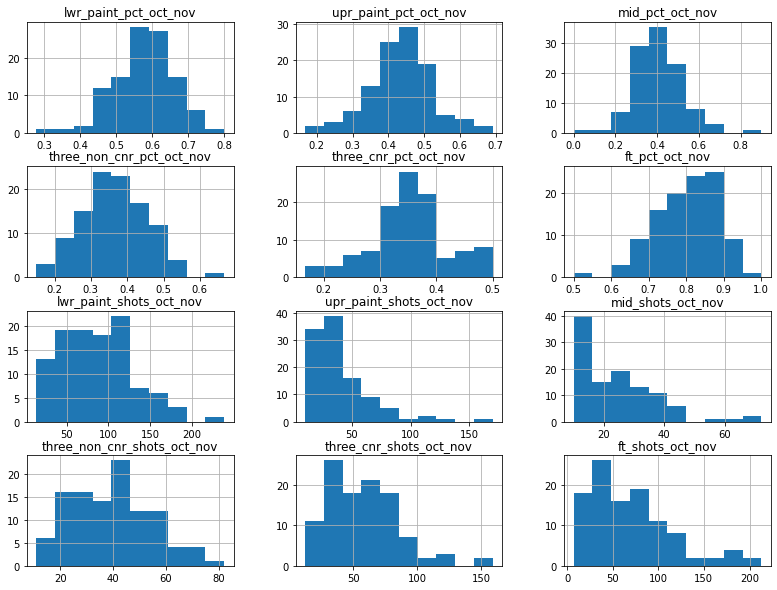

In [33]:
fig, axes = plt.subplots(nrows = 4, ncols=3, figsize=(13.33, 10))
df.loc[:,'lwr_paint_pct_oct_nov': 'ft_shots_oct_nov'].hist(ax=axes)
plt.show()

In [25]:
df.loc[:,'lwr_paint_pct_oct_nov': 'ft_shots_oct_nov'].mean()

lwr_paint_pct_oct_nov           0.575398
upr_paint_pct_oct_nov           0.435944
mid_pct_oct_nov                 0.407519
three_non_cnr_pct_oct_nov       0.366417
three_cnr_pct_oct_nov           0.355046
ft_pct_oct_nov                  0.801222
lwr_paint_shots_oct_nov        88.138889
upr_paint_shots_oct_nov        40.425926
mid_shots_oct_nov              24.092593
three_non_cnr_shots_oct_nov    39.435185
three_cnr_shots_oct_nov        57.472222
ft_shots_oct_nov               69.425926
dtype: float64

In [26]:
df.loc[:,'lwr_paint_pct_oct_nov': 'ft_shots_oct_nov'].std()

lwr_paint_pct_oct_nov           0.083720
upr_paint_pct_oct_nov           0.091394
mid_pct_oct_nov                 0.121003
three_non_cnr_pct_oct_nov       0.088564
three_cnr_pct_oct_nov           0.068755
ft_pct_oct_nov                  0.083965
lwr_paint_shots_oct_nov        42.961939
upr_paint_shots_oct_nov        25.618409
mid_shots_oct_nov              13.055265
three_non_cnr_shots_oct_nov    15.021028
three_cnr_shots_oct_nov        28.042177
ft_shots_oct_nov               46.346965
dtype: float64

Looking at the histograms and corresponding means/standard deviations, one feature that jumps out is that the shot distributions are skewed right. For each type of shot, most players in this sample have a handful of shots from that distance, but there is a long tail corresponding to a few players with lots of those shots. Three point specialists show up with lots of attempted threes, while players who mainly play under the basket have few threes but more shots in the paint.

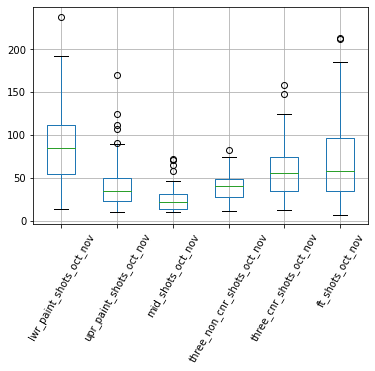

In [32]:
df.loc[:,'lwr_paint_shots_oct_nov': 'ft_shots_oct_nov'].boxplot()
plt.xticks(rotation=60)
plt.show()

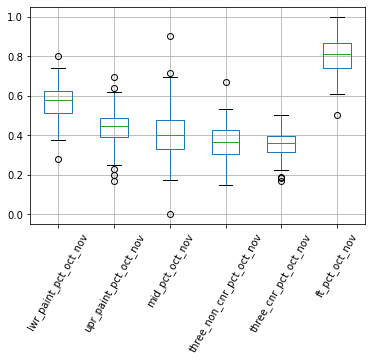

In [34]:
df.loc[:,'lwr_paint_pct_oct_nov':'ft_pct_oct_nov'].boxplot()
plt.xticks(rotation=60)
plt.show()

The above boxplots provide a similar view of the data, with the quartiles and outliers more clearly labeled. The length of the upper "whisker" and the number of outliers indicate the skewed right shape also seen in the histograms. This view also allows a direct visual comparison of the central value and spread of the variables on the same axes.

Now, I want to start looking at multidimensional dependencies, eventually building toward a model to forecast season three point percentage. First, I'll start small by looking at the correlations between variables.

## Predicting three point percentage

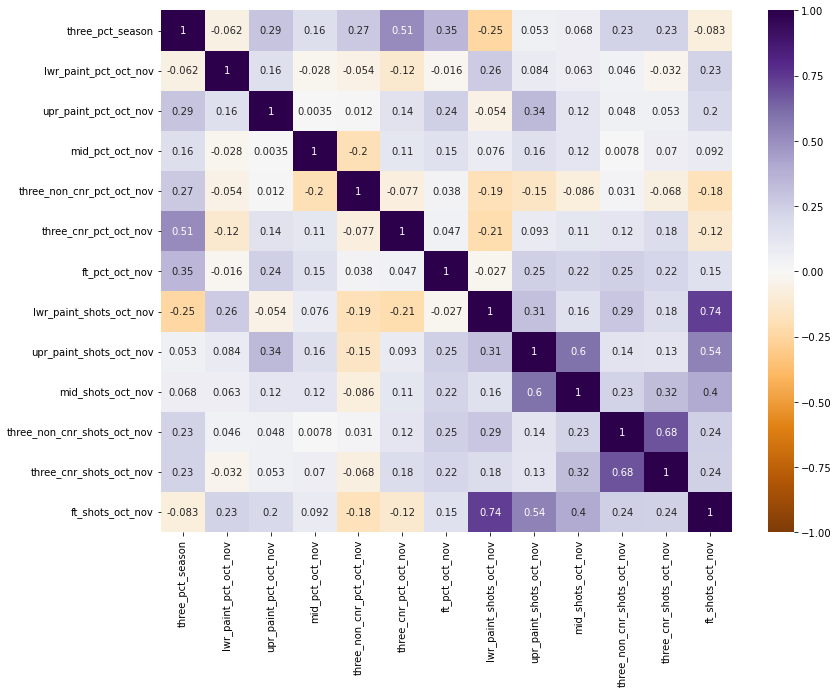

In [47]:
corrs = df.corr()
fig, ax = plt.subplots(figsize=(12.8,9.6))
sns.heatmap(corrs, xticklabels=corrs.columns, 
            yticklabels=corrs.columns, annot=True, 
            vmin=-1, center=0, vmax=1, cmap='PuOr',
            axes=ax)
plt.show()

Focusing on season three point percentage (first row/column), we can see moderate positive correlation with shooting percentage for all shot types except lower paint shots. There is also small positive correlation with the number of three point shots, while there is a negative correlation with free throws and lower paint shots. Free throws and lower paint shots are highly correlated, which makes sense - lots of fouls leading to free throws occur under the basket.

Outside of season three point percentage, there are some other correlations visible between the data variables. In addition to the lower paint shots/free throws coorrelation, there is also positive correlation between free throws and all shot types (more shots = more foul opportunities), but 2 pointers have larger correlationn thatn threes. There is also correlation between number of threes from corner and not from corner (makes sense, if you take lots of threes from corner you're likely also a player who takes threes elsewhere), and correlation between upper paint shots and mid distance two pointers, and a slightly smaller correlation between lower paint shots and upper paint shots.

Broadly, these correlations make sense. Players typically focus their play close to the basket, at mid-range, or beyond the arc. Where a player has most of his shots is also where that player has higher field goal percentage. Big men who play near the basket take more shots in the paint and are fouled more often. Nearby regions are correlated, for example players with more shots in the lower paint also have more shots in the upper paint. This all makes sense.

Now, to turn this conceptual understanding into a forecast for three point percentage.

My forecast will be a multiple linear regression using the data to make a prediction for end of season three point percentage.

For the sake of comparing multiple models, I will run several predictions with varying number of independent variables included. After running the models, I can use the results to identify the best model to use.

In [105]:
## Model 1: Use every variable as an input
model1 = sm.OLS.from_formula('three_pct_season ~ lwr_paint_pct_oct_nov + upr_paint_pct_oct_nov + \
                    mid_pct_oct_nov + three_non_cnr_pct_oct_nov + three_cnr_pct_oct_nov + \
                    ft_pct_oct_nov + lwr_paint_shots_oct_nov + upr_paint_shots_oct_nov + mid_shots_oct_nov + \
                    three_non_cnr_shots_oct_nov + three_cnr_shots_oct_nov + ft_shots_oct_nov',
                    data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       three_pct_season   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     8.738
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.44e-11
Time:                        13:11:25   Log-Likelihood:                 236.08
No. Observations:                 108   AIC:                            -446.2
Df Residuals:                      95   BIC:                            -411.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0820      0.042      1.952      0.054      -0.001       0.165
lwr_paint_pct_oct_nov           0.0107      0.036      0.300      0.765      -0.060       0.082
upr_paint_pct_oct_nov           0.0684      0.036      1.912      0.059      -0.003       0.139
mid_pct_oct_nov                 0.0518      0.024      2.126      0.036       0.003       0.100
three_non_cnr_pct_oct_nov       0.1326      0.034      3.948      0.000       0.066       0.199
three_cnr_pct_oct_nov           0.2546      0.044      5.734      0.000       0.166       0.343
ft_pct_oct_nov                  0.1047      0.037      2.815      0.006       0.031       0.179
lwr_paint_shots_oct_nov        -0.0002      0.000     -1.487      0.140      -0.000    5.56e-05
upr_paint_shots_oct_nov     -8.088e-05      0.000     -0.494      0.622      -0.000       0.000
mid_shots_oct_nov              -0.0002      0.000     -0.676      0.501      -0.001       0.000
three_non_cnr_shots_oct_nov     0.0003      0.000      1.091      0.278      -0.000       0.001
three_cnr_shots_oct_nov      9.308e-05      0.000      0.638      0.525      -0.000       0.000
ft_shots_oct_nov             7.042e-05      0.000      0.646      0.520      -0.000       0.000
==============================================================================
Omnibus:                        6.911   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.428
Skew:                          -0.522   Prob(JB):                       0.0402
Kurtosis:                       3.583   Cond. No.                     3.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
## Model 2: Remove a handful of variables with low correlation with the dependent variable and large P>|t|
## in Model 1, indicating they are not a significant predictor of the dependent variable
model2 = sm.OLS.from_formula('three_pct_season ~ mid_pct_oct_nov + three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov + lwr_paint_shots_oct_nov + \
                    three_non_cnr_shots_oct_nov + three_cnr_shots_oct_nov',
                    data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       three_pct_season   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.72e-12
Time:                        13:11:27   Log-Likelihood:                 232.68
No. Observations:                 108   AIC:                            -449.4
Df Residuals:                     100   BIC:                            -427.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.1016      0.036      2.859      0.005       0.031       0.172
mid_pct_oct_nov                 0.0465      0.024      1.910      0.059      -0.002       0.095
three_non_cnr_pct_oct_nov       0.1339      0.034      3.980      0.000       0.067       0.201
three_cnr_pct_oct_nov           0.2600      0.044      5.940      0.000       0.173       0.347
ft_pct_oct_nov                  0.1187      0.035      3.351      0.001       0.048       0.189
lwr_paint_shots_oct_nov        -0.0001   7.37e-05     -1.757      0.082      -0.000    1.67e-05
three_non_cnr_shots_oct_nov     0.0003      0.000      1.038      0.302      -0.000       0.001
three_cnr_shots_oct_nov      7.762e-05      0.000      0.553      0.582      -0.000       0.000
==============================================================================
Omnibus:                        8.168   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.852
Skew:                          -0.631   Prob(JB):                       0.0197
Kurtosis:                       3.392   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
## Model 3: Continue removing inputs, only the 4 most significant variables from Model 2
model3 = sm.OLS.from_formula('three_pct_season ~ mid_pct_oct_nov + three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov',
                    data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       three_pct_season   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     22.66
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.90e-13
Time:                        13:11:29   Log-Likelihood:                 230.01
No. Observations:                 108   AIC:                            -450.0
Df Residuals:                     103   BIC:                            -436.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0768      0.033      2.304      0.023       0.011       0.143
mid_pct_oct_nov               0.0422      0.024      1.728      0.087      -0.006       0.091
three_non_cnr_pct_oct_nov     0.1457      0.033      4.423      0.000       0.080       0.211
three_cnr_pct_oct_nov         0.2912      0.042      6.973      0.000       0.208       0.374
ft_pct_oct_nov                0.1377      0.034      4.002      0.000       0.069       0.206
==============================================================================
Omnibus:                       10.697   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.847
Skew:                          -0.703   Prob(JB):                      0.00441
Kurtosis:                       3.657   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
## Model 4: Only those variables with P>|t| less than 0.05, the most significant variables
model4 = sm.OLS.from_formula('three_pct_season ~ three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov',
                    data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       three_pct_season   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     28.68
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.36e-13
Time:                        13:11:30   Log-Likelihood:                 228.47
No. Observations:                 108   AIC:                            -448.9
Df Residuals:                     104   BIC:                            -438.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0883      0.033      2.676      0.009       0.023       0.154
three_non_cnr_pct_oct_nov     0.1342      0.033      4.120      0.000       0.070       0.199
three_cnr_pct_oct_nov         0.2979      0.042      7.095      0.000       0.215       0.381
ft_pct_oct_nov                0.1472      0.034      4.292      0.000       0.079       0.215
==============================================================================
Omnibus:                       13.662   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.164
Skew:                          -0.772   Prob(JB):                     0.000510
Kurtosis:                       3.992   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
## Model 5: Since corner/non-corner three % are correlated, try with only corner percentage
model5 = sm.OLS.from_formula('three_pct_season ~ three_cnr_pct_oct_nov + ft_pct_oct_nov',
                    data = df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       three_pct_season   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     29.96
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.06e-11
Time:                        13:11:32   Log-Likelihood:                 220.30
No. Observations:                 108   AIC:                            -434.6
Df Residuals:                     105   BIC:                            -426.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1376      0.033      4.171      0.000       0.072       0.203
three_cnr_pct_oct_nov     0.2842      0.045      6.325      0.000       0.195       0.373
ft_pct_oct_nov            0.1531      0.037      4.162      0.000       0.080       0.226
==============================================================================
Omnibus:                        5.433   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.813
Skew:                          -0.470   Prob(JB):                       0.0902
Kurtosis:                       3.431   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, to summarize my takeaways from these 5 models. Across the models, the largest slope parameter was consistently for three_cnr_pct_oct_nov, which was always about twice as large as the parameters corresponding to three_non_cnr_pct_oct_nov and ft_pct_oct_nov, which were the two next largest. It makes sense that these three measures of shooting ability are the most correlated/significant predictors. It is interesting that shots from the corner have a larger coefficient, but it should be noted that the mean number of corner threes attempted in the October/November data is 57.4, while the mean non-corner three attempts is 39.4. So it makes sense that the coefficienct would be larger for the type of three that makes up more of the total percentage. The fact that is is about twice as large (larger than just the average number of shots difference) could indicate that these corner threes are somehow a better measure of true shooting ability.
(** See Conclusion for more on this topic.)

As is always true for nested models, the R-squared is best for the largest models. The adjusted R-squared takes this into account, but is still larger for the larger models. I will devote some time to comparing the measures of the strength of these models.

Model 4 looks significantly better than Model 5, indicating that there is benefit to including information on both corner and non-corner threes in the model.

One way to decide whether to include more variables is to run F-tests comparing models. In these tests, a smaller model is considered the null hypothesis and a model that adds variables is the alternate hypothesis. Following these tests, variables are only added to the model if the F-test indicates that the larger model produces improvements that are statistically significant.

From the tests below, using a p-value of 0.05, we can see (from the value of Pr(>F)) that the variable added to Model 4 is significant compared to the smaller Model 5. However, none of the models 1-3 produce significant differences compared to Model 4. We should not reject the null hypothesis therefore, and we should keep Model 4 as is, with no additional variables.

In [110]:
from statsmodels.stats.anova import anova_lm
anova_results54 = anova_lm(model5, model4)
print('Compare Model 4 to Model 5: \n', anova_results54.round(2))
anova_results43 = anova_lm(model4, model3)
print('Compare Model 3 to Model 4: \n', anova_results43.round(2))
anova_results42 = anova_lm(model4, model2)
print('Compare Model 3 to Model 4: \n', anova_results42.round(2))
anova_results41 = anova_lm(model4, model1)
print('Compare Model 3 to Model 4: \n', anova_results41.round(2))

Compare Model 4 to Model 5: 
    df_resid   ssr  df_diff  ss_diff      F  Pr(>F)
0     105.0  0.11      0.0      NaN    NaN     NaN
1     104.0  0.09      1.0     0.02  16.98     0.0
Compare Model 3 to Model 4: 
    df_resid   ssr  df_diff  ss_diff     F  Pr(>F)
0     104.0  0.09      0.0      NaN   NaN     NaN
1     103.0  0.09      1.0      0.0  2.99    0.09
Compare Model 3 to Model 4: 
    df_resid   ssr  df_diff  ss_diff     F  Pr(>F)
0     104.0  0.09      0.0      NaN   NaN     NaN
1     100.0  0.09      4.0     0.01  2.03     0.1
Compare Model 3 to Model 4: 
    df_resid   ssr  df_diff  ss_diff    F  Pr(>F)
0     104.0  0.09      0.0      NaN  NaN     NaN
1      95.0  0.08      9.0     0.01  1.6    0.13


Another measure of performanace are the log-likelihood (https://en.wikipedia.org/wiki/Likelihood_function#Log-likelihood), AIC (https://en.wikipedia.org/wiki/Akaike_information_criterion) and BIC (https://en.wikipedia.org/wiki/Bayesian_information_criterion).

The better models have larger log-likeilhoods and smaller AIC/BIC. The benefit of using AIC and BIC is that these scores take into account the log-likelihood as welll as the number of parameters and so protect against over-fitting. The parameter penalty is larger for BIC, so BIC can be used to choose the simplest model that gives the best results.

In general, my approach is to tend toward the BIC-approved model. It's often good to keep things as simple as possible to improve interpretability.

The AIC values of these models are not too dissimilar, but there is a clear preference in BIC for the smaller models, with Model 4 having the largest BIC.

In [93]:
print(model1.llf, model2.llf, model3.llf, model4.llf)
print(model1.aic, model2.aic, model3.aic, model4.aic)
print(model1.bic, model2.bic, model3.bic, model4.bic)

236.07786460354458 232.67849940518113 230.01097727318734 228.46790967769545
-446.15572920708917 -449.35699881036226 -450.0219545463747 -448.9358193553909
-411.2880232544743 -427.8999489933685 -436.6112984107536 -438.207294446894


These tests used the entire dataset for predictions. This means that we have no way of testing out-of-sample predictions. To remedy this, I will split the data 70%/30% into training/testing data. The larger training sample will be used to fit the models, while the testing dataset can be used to test the prediction with a sample that was not itself used to fit the model.

In [150]:
indices = range(len(df))
s = int(0.7*len(indices))
train_ind = np.random.choice(indices, size = s, replace = False)
test_ind = list(set(indices) - set(train_ind))
df_train = df.iloc[train_ind]
df_test = df.iloc[test_ind]

In [151]:
model1 = sm.OLS.from_formula('three_pct_season ~ lwr_paint_pct_oct_nov + upr_paint_pct_oct_nov + \
                    mid_pct_oct_nov + three_non_cnr_pct_oct_nov + three_cnr_pct_oct_nov + \
                    ft_pct_oct_nov + lwr_paint_shots_oct_nov + upr_paint_shots_oct_nov + mid_shots_oct_nov + \
                    three_non_cnr_shots_oct_nov + three_cnr_shots_oct_nov + ft_shots_oct_nov',
                    data = df_train).fit()
model2 = sm.OLS.from_formula('three_pct_season ~ mid_pct_oct_nov + three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov + lwr_paint_shots_oct_nov + \
                    three_non_cnr_shots_oct_nov + three_cnr_shots_oct_nov',
                    data = df_train).fit()
model3 = sm.OLS.from_formula('three_pct_season ~ mid_pct_oct_nov + three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov',
                    data = df_train).fit()
model4 = sm.OLS.from_formula('three_pct_season ~  three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov',
                    data = df_train).fit()

In [152]:
fitted1 = model1.predict(df_test)
fitted2 = model2.predict(df_test)
fitted3 = model3.predict(df_test)
fitted4 = model4.predict(df_test)

One way of measuring the quality of the models is to calculate the (predictive) root mean squared error of the predicted values compared to the true values. This gives an average deviation between the predictions for the test sample and the true values.

In [153]:
true_pct = df_test.three_pct_season
prmse1 = np.sqrt(np.mean(np.square(true_pct - fitted1)))
prmse2 = np.sqrt(np.mean(np.square(true_pct - fitted2)))
prmse3 = np.sqrt(np.mean(np.square(true_pct - fitted3)))
prmse4 = np.sqrt(np.mean(np.square(true_pct - fitted4)))

In [154]:
print(prmse1,prmse2,prmse3,prmse4)

0.03730450743050017 0.03285327149032649 0.02912865632581131 0.029494183244645127


The above values showed that (for the time I originally ran this test), Model 3 had the smallest PRMSE. The exact value of the PRMSE for each model depends in part on the exact splitting of testing/training datasets. By running the previous steps a few times I saw that I got different answers for which model had the lowest PRMSE. To get a more robust idea of these results, I will repeat the splitting many times to see how often each model is indeed the best.

In [112]:
import random
from datetime import datetime

In [128]:
nTests = 1000
bestModel = [0, 0, 0, 0]
avgPRMSE = [[], [], [], []]
for _ in range(nTests):
    random.seed(datetime.now().timestamp())
    indices = range(len(df))
    s = int(0.7*len(indices))
    train_ind = np.random.choice(indices, size = s, replace = False)
    test_ind = list(set(indices) - set(train_ind))
    df_train = df.iloc[train_ind]
    df_test = df.iloc[test_ind]
    model1 = sm.OLS.from_formula('three_pct_season ~ lwr_paint_pct_oct_nov + upr_paint_pct_oct_nov + \
                    mid_pct_oct_nov + three_non_cnr_pct_oct_nov + three_cnr_pct_oct_nov + \
                    ft_pct_oct_nov + lwr_paint_shots_oct_nov + upr_paint_shots_oct_nov + mid_shots_oct_nov + \
                    three_non_cnr_shots_oct_nov + three_cnr_shots_oct_nov + ft_shots_oct_nov',
                    data = df_train).fit()
    model2 = sm.OLS.from_formula('three_pct_season ~ mid_pct_oct_nov + three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov + lwr_paint_shots_oct_nov + \
                    three_non_cnr_shots_oct_nov + three_cnr_shots_oct_nov',
                    data = df_train).fit()
    model3 = sm.OLS.from_formula('three_pct_season ~ mid_pct_oct_nov + three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov',
                    data = df_train).fit()
    model4 = sm.OLS.from_formula('three_pct_season ~  three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov',
                    data = df_train).fit()
    
    fitted1 = model1.predict(df_test)
    fitted2 = model2.predict(df_test)
    fitted3 = model3.predict(df_test)
    fitted4 = model4.predict(df_test)
    
    true_pct = df_test.three_pct_season
    prmse1 = np.sqrt(np.mean(np.square(true_pct - fitted1)))
    prmse2 = np.sqrt(np.mean(np.square(true_pct - fitted2)))
    prmse3 = np.sqrt(np.mean(np.square(true_pct - fitted3)))
    prmse4 = np.sqrt(np.mean(np.square(true_pct - fitted4)))
    
    tmpPRMSE = [prmse1, prmse2, prmse3, prmse4]
    for i in range(4):
        avgPRMSE[i].append(tmpPRMSE[i])
    bestModel[np.argmin(tmpPRMSE)] += 1
print([x/nTests for x in bestModel])
print([np.mean(x) for x in avgPRMSE])

[0.151, 0.349, 0.273, 0.227]
[0.031792390015366365, 0.03057735909022431, 0.030275925808765283, 0.030331217499492174]


From these 1000 tests, I see that actually Model 2 had the lowest PRMSE more often than the other models. Somewhat confusingly, however, Model 2 did not have the lowest average PRMSE. This indicates that Model 2 had more high values of PRMSE than the other models, and although about 1/3 of the time it had the best score, on average it performed slightly worse.

The histogram distributions of PRMSE for each model are shown below. Models 3 and 4 seem to have slightly skewed left distributions, indicating they were slighly more likely to have small values of PRMSE than the other models, although they did not always have a smaller value.

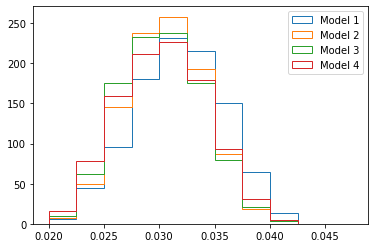

In [134]:
binvals = np.arange(0.02,0.05,0.0025)
plt.hist(avgPRMSE[0], bins=binvals, histtype='step', label='Model 1')
plt.hist(avgPRMSE[1], bins=binvals, histtype='step', label='Model 2')
plt.hist(avgPRMSE[2], bins=binvals, histtype='step', label='Model 3')
plt.hist(avgPRMSE[3], bins=binvals, histtype='step', label='Model 4')
plt.legend()
plt.show()

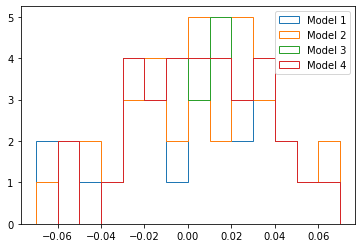

In [160]:
binvals = np.arange(-0.07,0.07,0.01)
res1 = true_pct - fitted1
res2 = true_pct - fitted2
res3 = true_pct - fitted3
res4 = true_pct - fitted4
plt.hist(res1, bins=binvals, histtype='step', label='Model 1')
plt.hist(res2, bins=binvals, histtype='step', label='Model 2')
plt.hist(res3, bins=binvals, histtype='step', label='Model 3')
plt.hist(res4, bins=binvals, histtype='step', label='Model 4')
plt.legend()
plt.show()

## Choosing a model

Taking all the above information into account, my choice of a model is **Model 4**.

The most important results that informed my decision were the fact that the F-tests and BIC preferred the simpler Model 4 over the other models. Although the PRMSE was not smallest for Model 4 on average, the differences between the models in this test were quite small. Taking all of this into account, my preference is to use the simplest model that still gives roughly the same result.

Therefore,to predict end of season three point field goal percentage, my method of choice is to run a multiple linear regression using players' October/November values of non-corner three point field goal percentage, corner three point field goal percentage and free throw percentage.

## Evaluating the model performance

Now, I will continue to perform tests on the model to determine its quality.

In [179]:
model4 = sm.OLS.from_formula('three_pct_season ~ three_non_cnr_pct_oct_nov + \
                    three_cnr_pct_oct_nov + ft_pct_oct_nov',
                    data = df).fit()
fitted4 = model4.predict(df)
print(model4.rsquared)
print(model4.params)

0.4527055302282097
Intercept                    0.088279
three_non_cnr_pct_oct_nov    0.134249
three_cnr_pct_oct_nov        0.297868
ft_pct_oct_nov               0.147211
dtype: float64


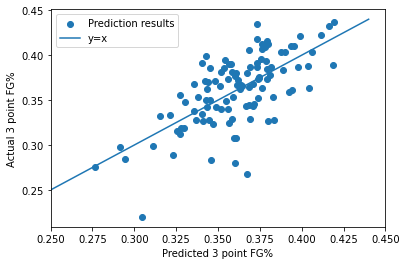

In [164]:
plt.scatter(fitted4, df.three_pct_season,label='Prediction results')
plt.xlim(0.25,0.45)
plt.plot(np.arange(0.25,0.45,0.01), np.arange(0.25,0.45,0.01), label='y=x')
plt.xlabel('Predicted 3 point FG%')
plt.ylabel('Actual 3 point FG%')
plt.legend()
plt.show()

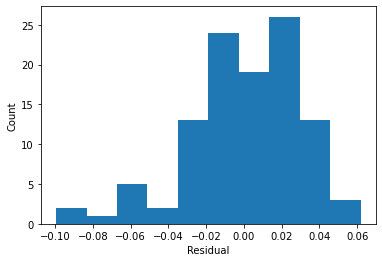

In [165]:
residuals = df.three_pct_season - fitted4
prmse4 = np.sqrt(np.mean(np.square(df.three_pct_season - fitted4)))
plt.hist(residuals)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [166]:
print(prmse4)

0.029176778546980763


The average root mean square difference between the predictions and actual end of season three point field goal percentage values is 2.9%. The histogram of residuals shows that they are slightly left-skewed. Ideally, these would follow an approximately normal distribution.

In [171]:
three_made_oct_nov = df.three_non_cnr_pct_oct_nov * df.three_non_cnr_shots_oct_nov + df.three_cnr_pct_oct_nov * df.three_cnr_shots_oct_nov
three_att_oct_nov = df.three_non_cnr_shots_oct_nov + df.three_cnr_shots_oct_nov
three_pct_oct_nov = three_made_oct_nov / three_att_oct_nov
prmse_naive = np.sqrt(np.mean(np.square(df.three_pct_season - three_pct_oct_nov)))
print(prmse_naive)

0.04218190183767146


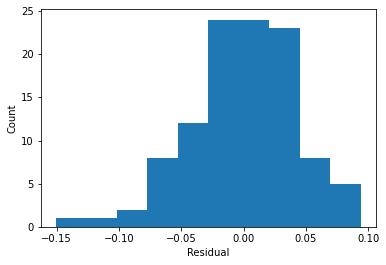

In [172]:
plt.hist(df.three_pct_season - three_pct_oct_nov)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

Comparing the results of my model to a naive approach, where we just assume that each player's three point field goal percentage in October/November will be the same as their end of season percentage, we see that the model improves the RMS error down from a 4.2% difference between October/November stats to a 2.9% difference between predicted and actual values. This improvement represents about a 30% improvement in the average prediction deviation.

Another naive approach for a simple model is to just assign everyone a prediction equal to the average in the sample. This method doesn't take any individual performance into account and just treats everyone as an average player, which in this sample is a 36.1% three point field goal percentage.

In [173]:
avg_three_pct_oct_nov = np.mean(three_pct_oct_nov)
print(avg_three_pct_oct_nov)

0.3612208764888254


In [176]:
prmse_naive2 = np.sqrt(np.mean(np.square(df.three_pct_season - avg_three_pct_oct_nov)))
print(prmse_naive2)

0.03943910867202648


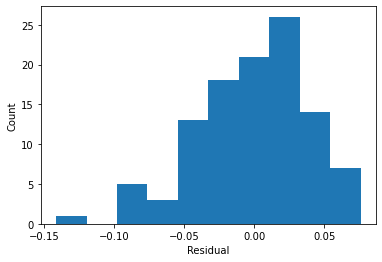

In [177]:
plt.hist(df.three_pct_season - avg_three_pct_oct_nov)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

Comparing this naive approach to my model, I still see improvement compared the naive approach. The approach treating everyone as an average three point shooter actually does better than assuming everyone will maintain their October/November stats. This indicates an overall regression to the mean across the sample - it is better to assume everyone will be an average player rather than use their current stats to forecast forward. However, my model beats both of these approaches. There is some reversion to the mean, however the model correctly also takes into account where each player's stats are in October/November without completely reverting them to the mean.

To turn these comparisons into a single value, I will calculate a skill score (https://en.wikipedia.org/wiki/Forecast_skill) for my model compred to these 2 naive approaches. I want my skill score to be positive, indicating better performance than a naive approach and as close to 1 as possible.

In [178]:
mse_naive1 = np.mean(np.square(df.three_pct_season - three_pct_oct_nov))
mse_naive2 = np.mean(np.square(df.three_pct_season - avg_three_pct_oct_nov))
mse_model4 = np.mean(np.square(df.three_pct_season - fitted4))
ss_1 = 1 - mse_model4 / mse_naive1
ss_2 = 1 - mse_model4 / mse_naive2
print(ss_1, ss_2)

0.5215656370382409 0.45270624117507974


My model performs better than both naive approaches by a fair amount. Hence, my model provides actual information above and beyond these two naive approaches to modeling this problem.

## Conclusion

My prediction for end of season three point field goal percentage is given by:
$$ \text{three_pct_season} =  0.088279 + 0.134249 * \text{three_non_cnr_pct_oct_nov} + 0.297868 * \text{three_cnr_pct_oct_nov} + 0.147211 * \text{ft_pct_oct_nov} $$

This model was determined by performing several multiple linear regressions with different sets of independent variables. This model had the same overall performance as models with more input variables, but with only 3 independent variables it is fairly simple. As judged by the R-squared value, this model can account for 45% of the variation in players' three point field goal percentage. The average RMS error for this model is a 2.9% difference between predicted and actual three point field goal percentage. This model improved significantly over two naive approaches that assumed players' stats would persist from October/November to the end of the season or that each player would end with the average three point field goal percentage.

### Future Studies/Improvement

One approach I would have liked to try given more time would be to separately predict each players corner and non-corner three point field goal percentage as well as each players total number of attempted corner and non-corner three point field goals. This approach might be able to better separate out each player's performance in the two regions. As I forecast now, I don't take into account what fraction of threes is in each region, and it's possible using this information could improve the model.

I had already used a significant portion of my 4 hours before I considered this approach, and I chose to continue with what ultimately became my end result approach rather than try this new method, but with more time in the future I would like to consider this method.